# Анализ данных `Climate at a Glance`

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns  
from matplotlib import pyplot as plt

In [3]:
# Data = pd.read_csv("C:/Climate at a Glance (1).csv") # Просто читаем данные
Data = pd.read_csv("Climate.csv")
Data.head(6)

,Global Land Temperature Anomalies,value
0,Units: Degrees Celsius,NaN
1,Base Period: 1901-2000,NaN
2,Missing: -999,NaN
3,Year,Value
4,188001,-0.33
5,188002,-0.72


Обрежем первые три строки, т.к. это техническая информация, и она нам не нужна.

Переименуем столбцы для удобства.

In [3]:
Data1 = Data.drop(index = range(0, 4)) # Обрезка на 4 строки

Data1 = np.array(Data1) 
Data1 = pd.DataFrame(Data1)

Data1 = Data1.rename(columns = {0 : 'date', 1 : 'value'}) # Переименование столбцов

DataTr = Data1

Data1.head()

,date,value
0,1881,-0.44
1,1882,-0.42
2,1883,-0.70
3,1884,-0.59
4,1885,-0.73


In [4]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    139 non-null    object
 1   value   139 non-null    object
dtypes: object(2)
memory usage: 2.3+ KB


Видим, что дату нужно заменить на временной тип, а данные нужно изменить на читаемые программой, т.е. на число с плавющей точкой

In [5]:
Data1.date = pd.to_datetime(Data1.date, format="%Y") 
                                                            
Data1['value'] = Data1['value'].astype({'value': 'float64'}) 
Data1 = Data1.set_index('date')

print(Data1.info())
Data1.head() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 1881-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   139 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB
None


,value
date,
1881-01-01,-0.44
1882-01-01,-0.42
1883-01-01,-0.70
1884-01-01,-0.59
1885-01-01,-0.73


In [6]:
Data2 = Data1.asfreq('QS', method = 'ffill')

In [7]:
Data2.isna().sum()

value    0
dtype: int64

In [8]:
Data2.index

DatetimeIndex(['1881-01-01', '1881-04-01', '1881-07-01', '1881-10-01',
               '1882-01-01', '1882-04-01', '1882-07-01', '1882-10-01',
               '1883-01-01', '1883-04-01',
               ...
               '2016-10-01', '2017-01-01', '2017-04-01', '2017-07-01',
               '2017-10-01', '2018-01-01', '2018-04-01', '2018-07-01',
               '2018-10-01', '2019-01-01'],
              dtype='datetime64[ns]', name='date', length=553, freq='QS-JAN')

Проверим данные на стаиционарность

In [9]:
from statsmodels.tsa.stattools import adfuller, kpss 



result = adfuller(Data2['value'], autolag='AIC')
print(f'Тест Дики — Фуллера: {result[0]}')
print(f'p-значение: {result[1]}')

if result[1] > 0.05:
    print('Нестационарный ряд')
else:
    print('Стационарный ряд')


Тест Дики — Фуллера: 0.6363439612574765
p-значение: 0.9884780157361781
Нестационарный ряд


In [10]:
stats, p, lags, critical_values = kpss(Data2['value'], 'ct')
print(f'Тест Квятковского-Филлипса-Шмидта-Шина: {stats}')
print(f'p-значение: {p}')

if p<0.05:
      print('Нестационарный ряд')
else:
      print('Стационарный ряд') 



Тест Квятковского-Филлипса-Шмидта-Шина: 0.4571525020121763
p-значение: 0.01
Нестационарный ряд


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Данные нестационарны, т.е. меняются во времени

# 1) Строим графики

График зависимости температуры от месяца и года

Text(0, 0.5, 'Температура в градусах цельсия')

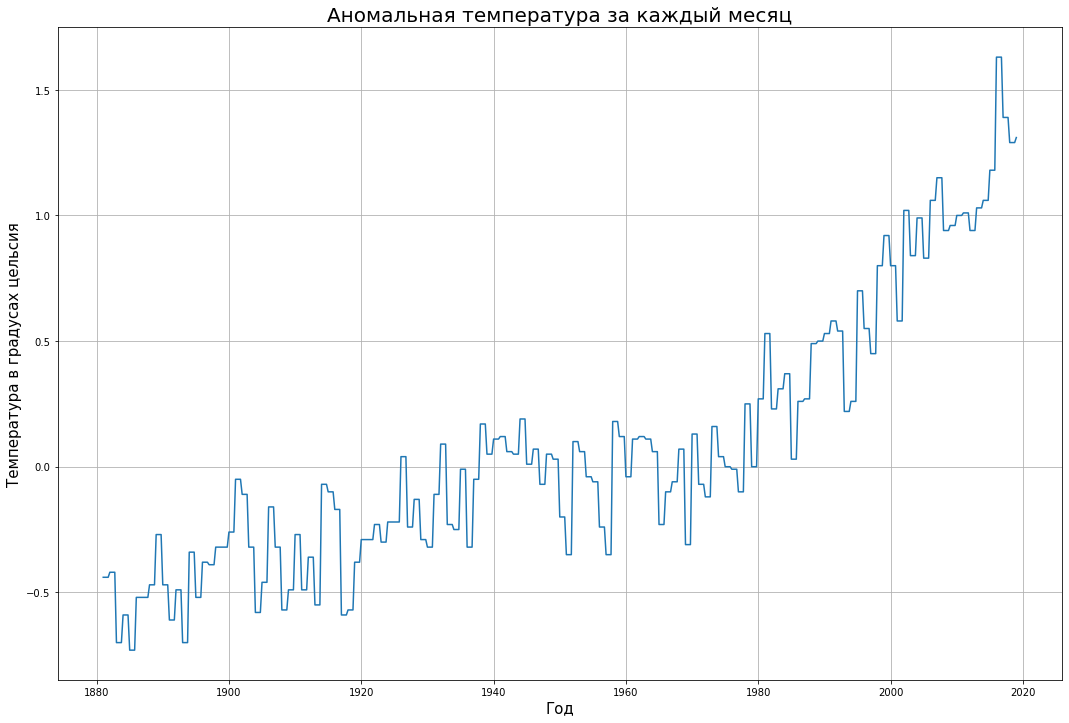

In [11]:
# Просто график температуры от года

fig, ax1 = plt.subplots(1,figsize=(18,12))
ax1.plot(Data2)
ax1.grid()
ax1.set_title('Аномальная температура за каждый месяц', fontsize = 20);
ax1.set_xlabel('Год', fontsize = 15)
ax1.set_ylabel('Температура в градусах цельсия', fontsize = 15)

Графики `тренда` (trend), `сезонности` (seasonal) и `случайные отклонения` (resid)

,Seasonality,Trend,Residual,Actual_values
date,,,,
1881-01-01,0.005093,-0.4475,0.002407,-0.44
1881-04-01,0.001364,-0.4425,0.001136,-0.44
1881-07-01,-0.001806,-0.4375,-0.000694,-0.44
1881-10-01,-0.004651,-0.4325,-0.002849,-0.44
1882-01-01,0.005093,-0.4275,0.002407,-0.42


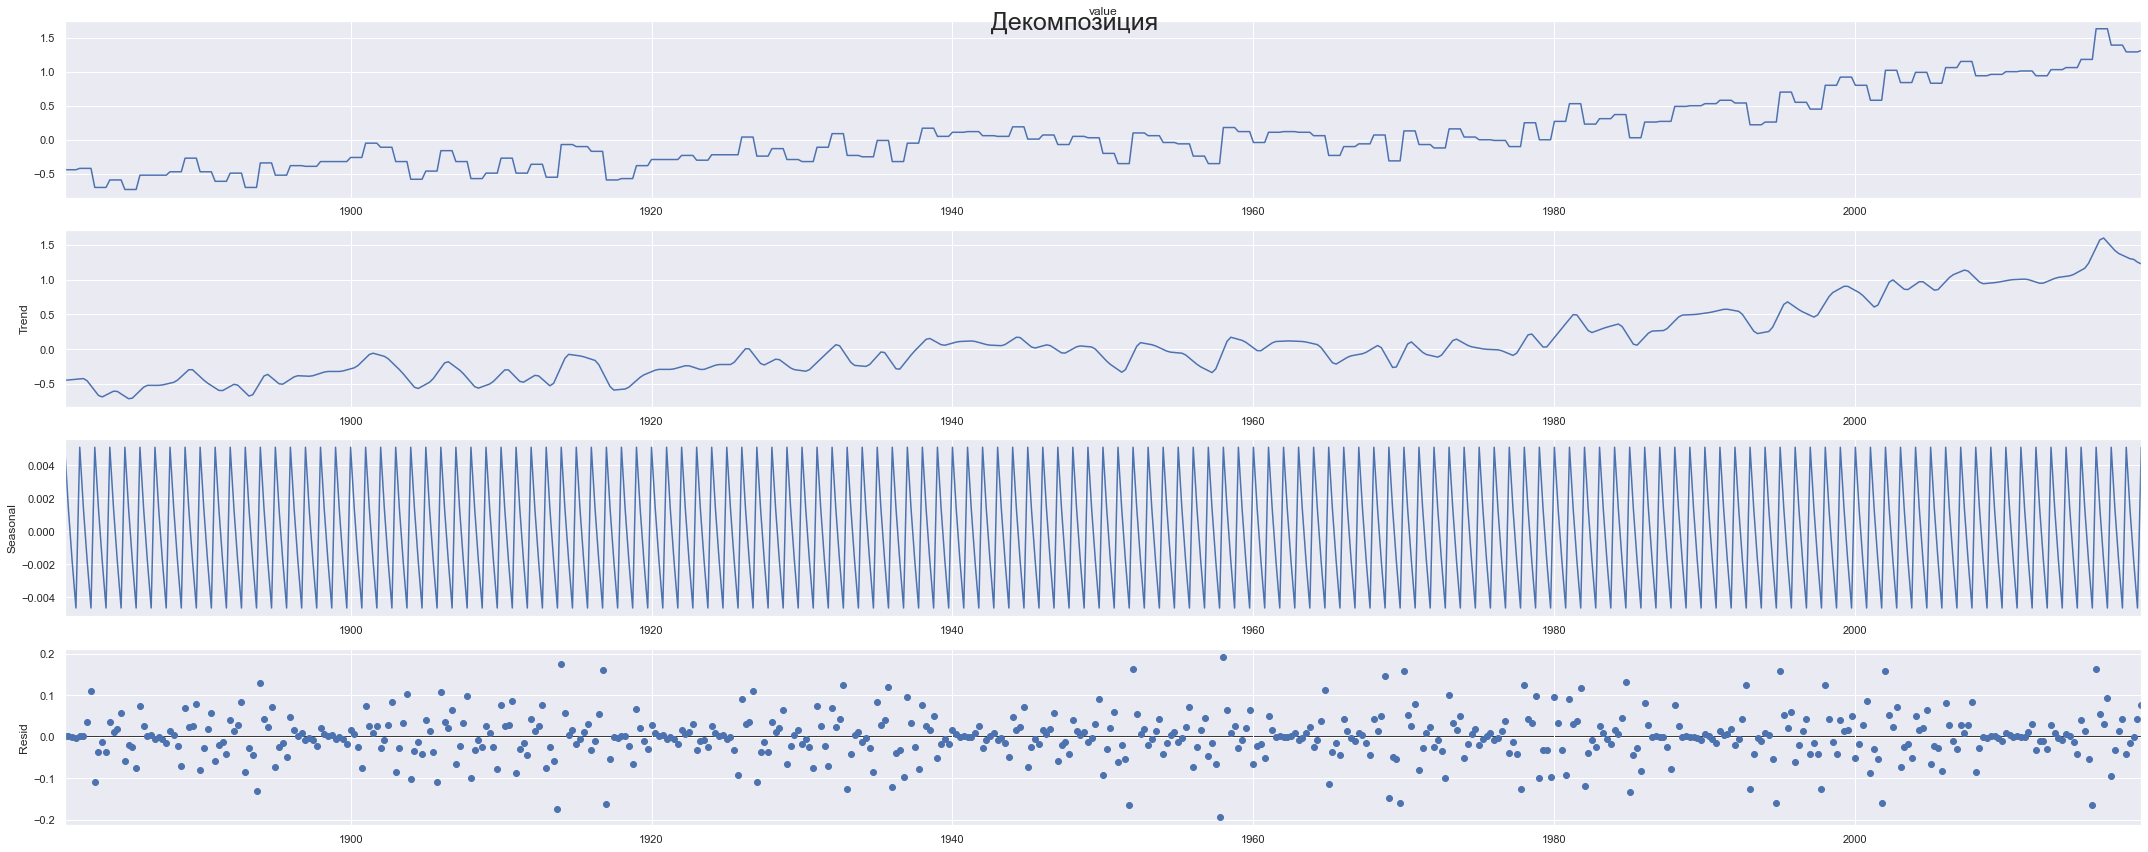

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Additive Decomposition (декомпозиция нашего временного ряда)
result_add = seasonal_decompose(Data2['value'], model='additive', extrapolate_trend='freq') # Декомпозиция

sns.set(rc={'figure.figsize':(30, 12)})
sns.set_style("darkgrid")
result_add.plot().suptitle('Декомпозиция', fontsize=25)

# Выделим Сезонность, Тренд, Остаток после удаления тренда
# Actual Values = Addition of (Seasonality + Trend + Residual)

df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['Seasonality', 'Trend', 'Residual', 'Actual_values']

# Скопируем случайные остатки в другую переменную
ResTime = df_reconstructed[['Residual']] 

df_reconstructed.head()

Передискретизация ряда по частотам

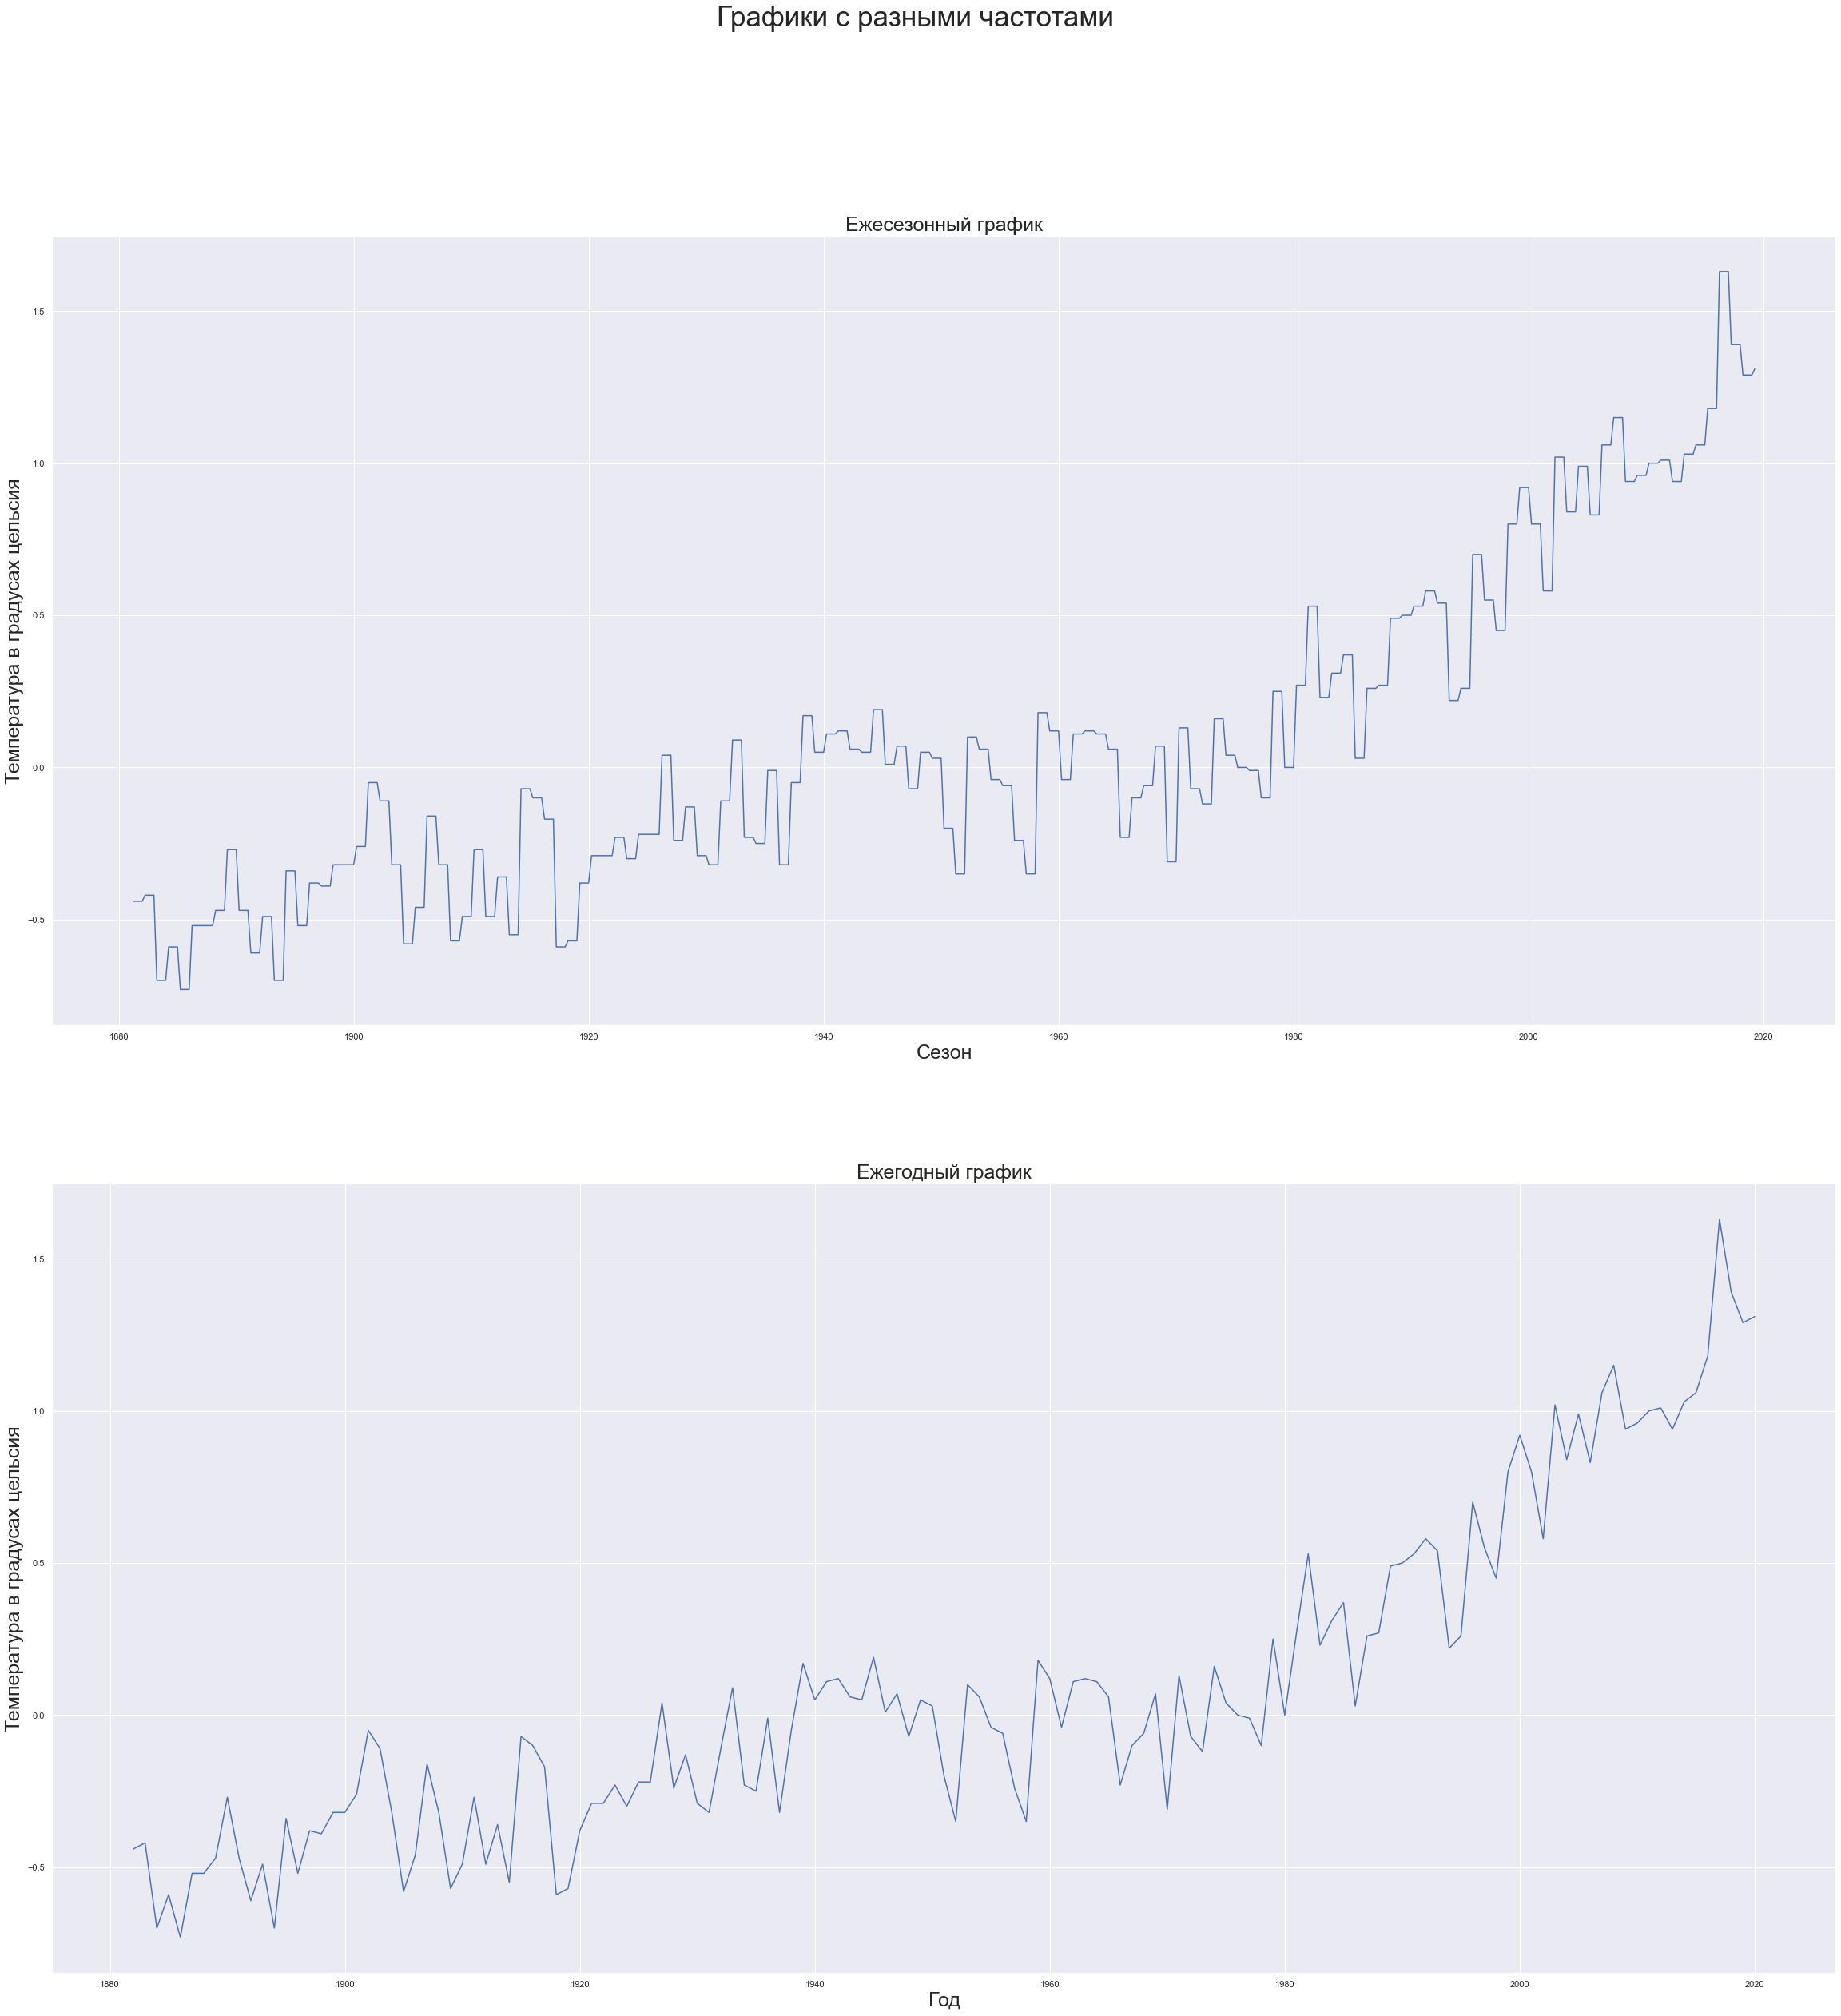

In [13]:

fig, (ax5,ax6) = plt.subplots(2, 1, figsize=(40,40))
plt.suptitle('Графики с разными частотами', fontsize = 35)

ax5.plot(Data2.resample('Q').mean())
ax5.set_title('Ежесезонный график', fontsize = 25);
ax5.set_xlabel('Сезон', fontsize = 25)
ax5.set_ylabel('Температура в градусах цельсия', fontsize = 25)

ax6.plot(Data2.resample('A').mean())
ax6.set_title('Ежегодный график', fontsize = 25);
ax6.set_xlabel('Год', fontsize = 25)
ax6.set_ylabel('Температура в градусах цельсия', fontsize = 25)

plt.show()

# 2) Подробнее рассмотрим графики

Графики скрипки

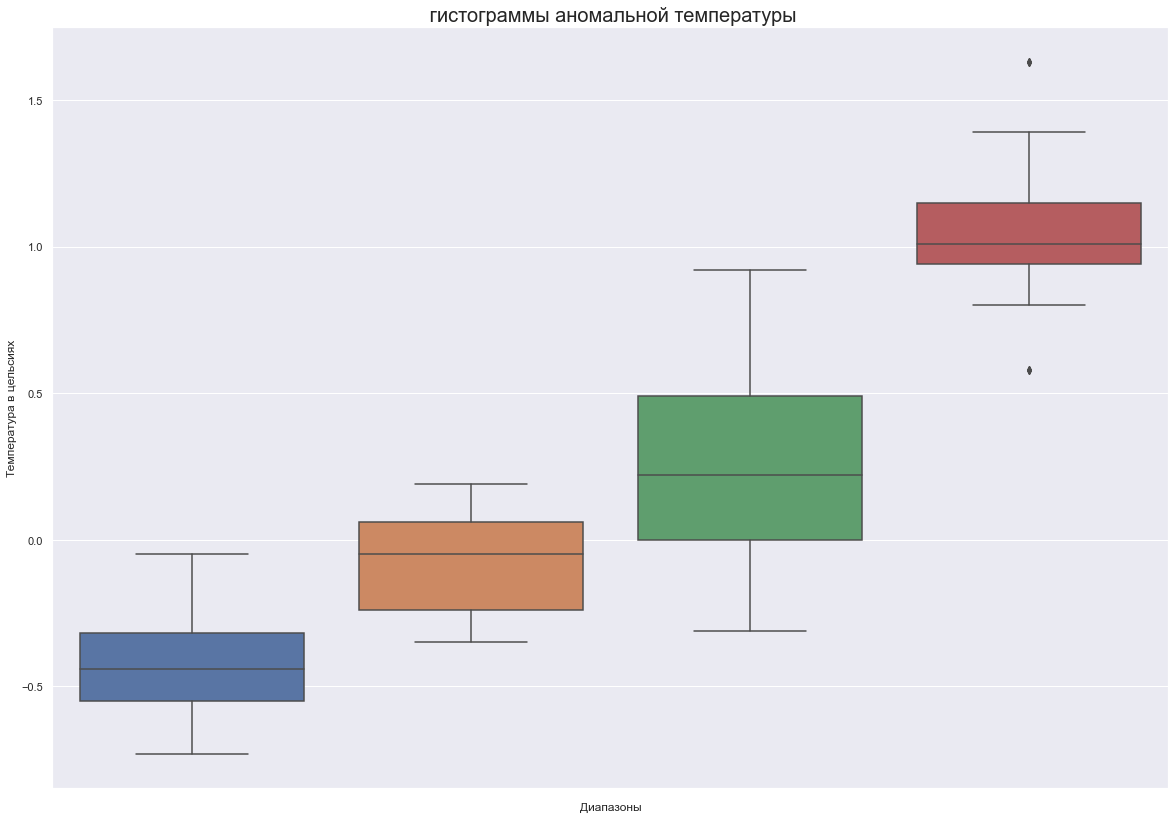

In [14]:

    
fig = plt.subplots(1, 1, figsize=(20,14))

# Рисование графиков

df1 = Data2.loc['1880-01-01':'1920-01-01']
df2 = Data2.loc['1920-01-01':'1960-01-01']
df3 = Data2.loc['1960-01-01':'2000-01-01']
df4 = Data2.loc['2000-01-01':'2020-01-01']

# ax = sns.violinplot(data = [df1, df2, df3, df4])
ax = sns.boxplot(data = [df1, df2, df3, df4])

plt.title(' гистограммы аномальной температуры', fontsize = 20)
ax.set(xlabel='Диапазоны', ylabel='Температура в цельсиях')
new_labels = ['label 1', 'label 2']
ax.set(xticklabels=[])
sns.set_style("whitegrid")
plt.show(ax)

# plt.title('Cкрипковые гистограммы аномальной температуры', fontsize = 20)
# ax.set(xlabel='Диапазоны', ylabel='Температура в цельсиях')
# new_labels = ['label 1', 'label 2']
# ax.set(xticklabels=[])
# sns.set_style("whitegrid")
# plt.show(ax)

In [15]:
print(df1.describe())
print(df2.describe())
print(df3.describe())
print(df4.describe())

            value
count  157.000000
mean    -0.411274
std      0.175407
min     -0.730000
25%     -0.550000
50%     -0.440000
75%     -0.320000
max     -0.050000
            value
count  161.000000
mean    -0.082484
std      0.170239
min     -0.350000
25%     -0.240000
50%     -0.050000
75%      0.060000
max      0.190000
            value
count  161.000000
mean     0.224099
std      0.285632
min     -0.310000
25%      0.000000
50%      0.220000
75%      0.490000
max      0.920000
           value
count  77.000000
mean    1.040390
std     0.225834
min     0.580000
25%     0.940000
50%     1.010000
75%     1.150000
max     1.630000


            value
date             
1881-01-01    NaN
1881-04-01   0.00
1881-07-01   0.00
1881-10-01   0.00
1882-01-01   0.02
...           ...
2018-01-01  -0.10
2018-04-01   0.00
2018-07-01   0.00
2018-10-01   0.00
2019-01-01   0.02

[553 rows x 1 columns]


Text(0, 0.5, 'Температура в градусах цельсия')

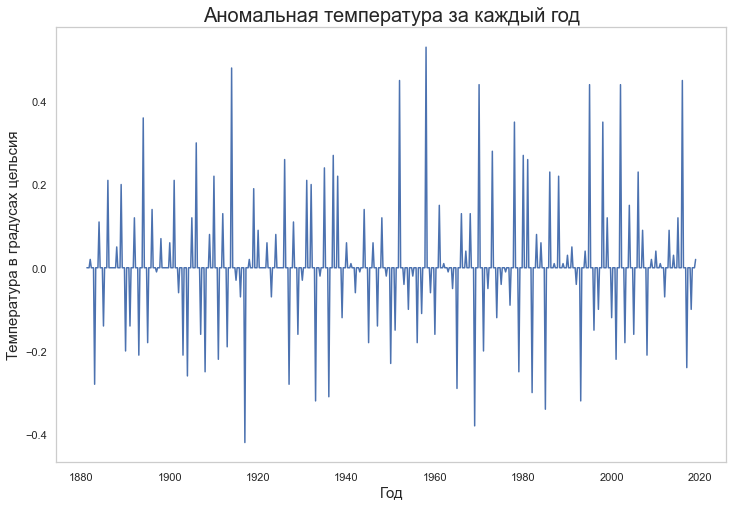

In [16]:

# # По умолчанию вычисляет первые разности (производные)
# функция diff() вычисляет разность исходного ряда с рядом с заданным смещением периода.

Dt = Data2.diff()
print(Dt)

fig, ax1 = plt.subplots(1,figsize=(12,8))
ax1.plot(Dt)
ax1.grid()
ax1.set_title('Аномальная температура за каждый год', fontsize = 20);
ax1.set_xlabel('Год', fontsize = 15)
ax1.set_ylabel('Температура в градусах цельсия', fontsize = 15)

            value
date             
1881-01-01    NaN
1881-04-01    NaN
1881-07-01   0.00
1881-10-01   0.00
1882-01-01   0.02
...           ...
2018-01-01  -0.10
2018-04-01  -0.10
2018-07-01   0.00
2018-10-01   0.00
2019-01-01   0.02

[553 rows x 1 columns]


Text(0, 0.5, 'Температура в градусах цельсия')

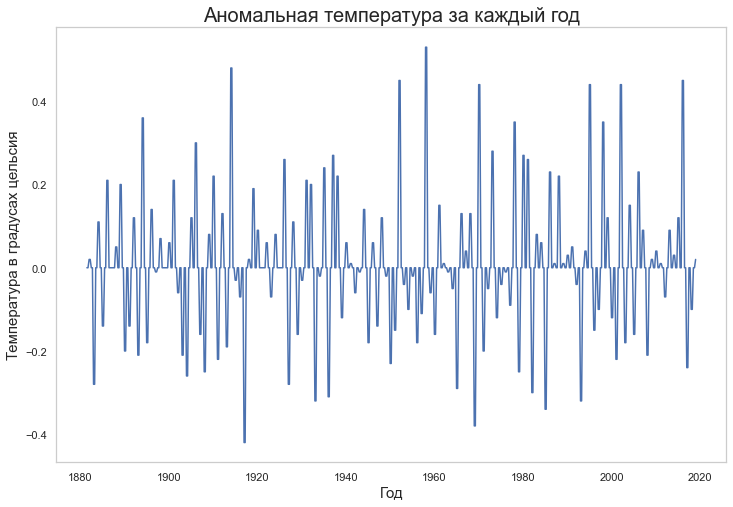

In [17]:


# # между 1м и 3м элементами, 2м  и 4м, … = вторые разности
Dt = Data2.diff(2)
print(Dt)

fig, ax1 = plt.subplots(1,figsize=(12,8))
ax1.plot(Dt)
ax1.grid()
ax1.set_title('Аномальная температура за каждый год', fontsize = 20);
ax1.set_xlabel('Год', fontsize = 15)
ax1.set_ylabel('Температура в градусах цельсия', fontsize = 15)

            value
date             
1881-01-01  -0.44
1881-04-01  -0.44
1881-07-01  -0.44
1881-10-01  -0.44
1882-01-01  -0.42
...           ...
2018-01-01   1.29
2018-04-01   1.29
2018-07-01   1.29
2018-10-01   1.29
2019-01-01   1.31

[553 rows x 1 columns]


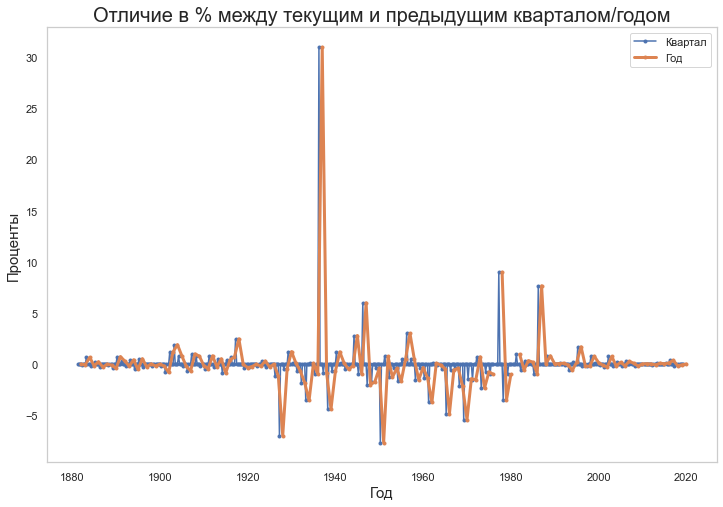

In [18]:


# отличие (в %)  между текущим и предыдущим эл-тами
Dt = Data2
print(Dt)

fig, ax1 = plt.subplots(1,figsize=(12,8))
ax1.plot(Dt.resample('Q').mean().pct_change().fillna(0), marker='o', markersize=3, label = 'Квартал')
ax1.plot(Dt.resample('Y').mean().pct_change().fillna(0), linewidth=3, marker='o', markersize=3, label = 'Год')
ax1.grid()
ax1.set_title('Отличие в % между текущим и предыдущим кварталом/годом', fontsize = 20);
ax1.set_xlabel('Год', fontsize = 15)
ax1.set_ylabel('Проценты', fontsize = 15)
plt.legend()
plt.show()

График средних значений

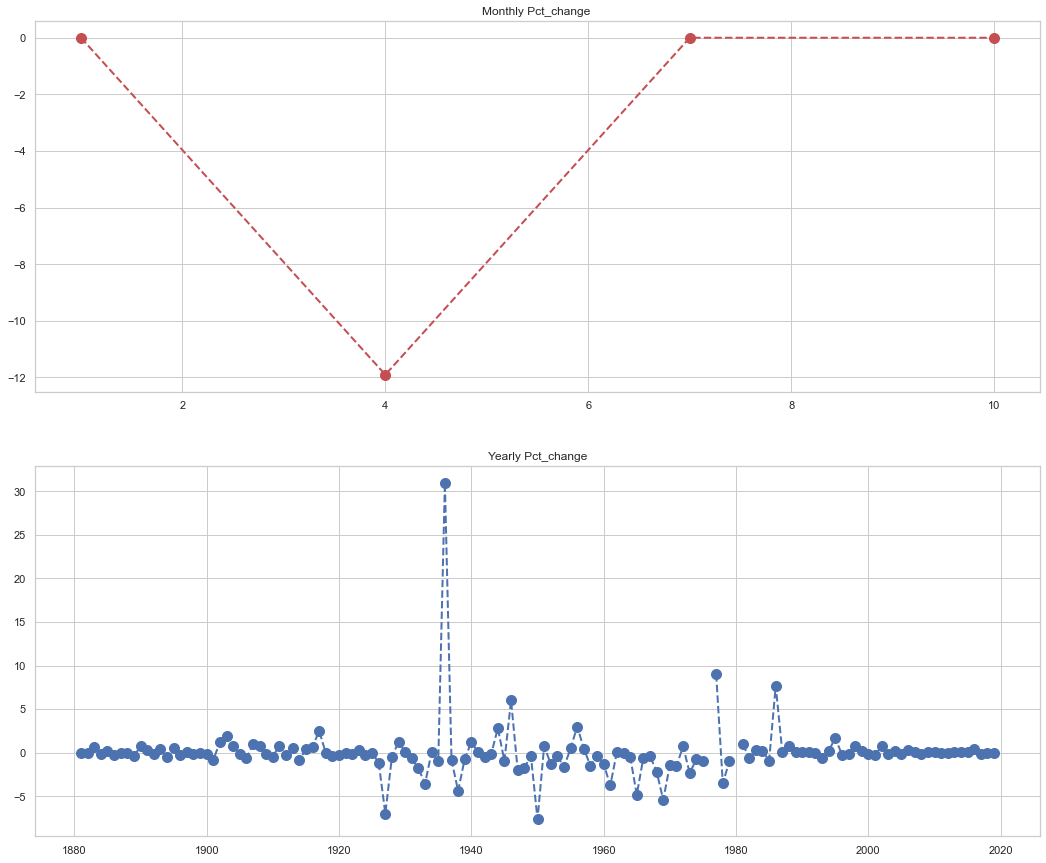

In [19]:


# вычислим среднее значение за все месяцы, годы и дни недели. 
# исп.  pct_change, чтобы увидеть, как шаблон изменился по сравнению с предыдущим. 
month_mean_df=Data2.groupby(Data2.index.month).mean().reset_index().rename(columns={"date": "Month", "value": "value_mean"})
month_mean_df.set_index("Month", drop=True, inplace=True)

year_mean_df=Data2.groupby(Data2.index.year).mean().reset_index().rename(columns={"date": "Year", "value": "value_mean"})
year_mean_df.set_index("Year", drop=True, inplace=True)

month_mean_df['Percentage_increase']=month_mean_df.pct_change().fillna(0)*100
year_mean_df['Percentage_increase']=year_mean_df.pct_change().fillna(0)

fig, (ax2,ax3) = plt.subplots(2,figsize=(18,15))
ax2.plot(month_mean_df.Percentage_increase,marker='o', linestyle='--', linewidth=2,markersize=10, color='r')
ax2.set_title('Monthly Pct_change ');
ax3.plot(year_mean_df.Percentage_increase,marker='o', linestyle='--', linewidth=2,markersize=10, color='b')
ax3.set_title('Yearly Pct_change');

In [20]:
# start, end = '1920-01-01', '1950-01-01'
# fig, ax = plt.subplots()

# ax.set_title('Среднее скользящее температурных данных', fontsize = 15)
# ax.plot(Data.loc[start:end], marker='o', markersize=8, linestyle='-', label='ORIGINAL_DATA',linewidth=3,color='k')
# # ax.plot(Data.rolling(window=2,center=True).mean().loc[start:end], marker='o', markersize=8, linestyle='--', label='ROLLING_WINDOW_SIZE_2',linewidth=3,color='g')
# ax.plot(Data.rolling(window=3,center=True).mean().loc[start:end], marker='o', markersize=8, linestyle='--', label='ROLLING_WINDOW_SIZE_5',linewidth=3,color='r')
# # ax.plot(Data.rolling(window=10,center=True).mean().loc[start:end], marker='o', markersize=8, linestyle='--',  label='ROLLING_WINDOW_SIZE_10',linewidth=3,color='r')
# # ax.plot(Data.rolling(window=20,center=True).mean().loc[start:end], marker='o', markersize=8, linestyle='--', label='ROLLING_WINDOW_SIZE_20',linewidth=3,color='b')
# ax.plot(Data.rolling(window=50,center=True).mean().loc[start:end], marker='o', markersize=8, linestyle='--', label='ROLLING_WINDOW_SIZE_50',linewidth=3,color='m')
# ax.set_xlabel('Год', fontsize = 15)
# ax.set_ylabel('Температура в градусах цельсия', fontsize = 15)
# ax.legend();


Графики с математическим средним скользящим окном и др.

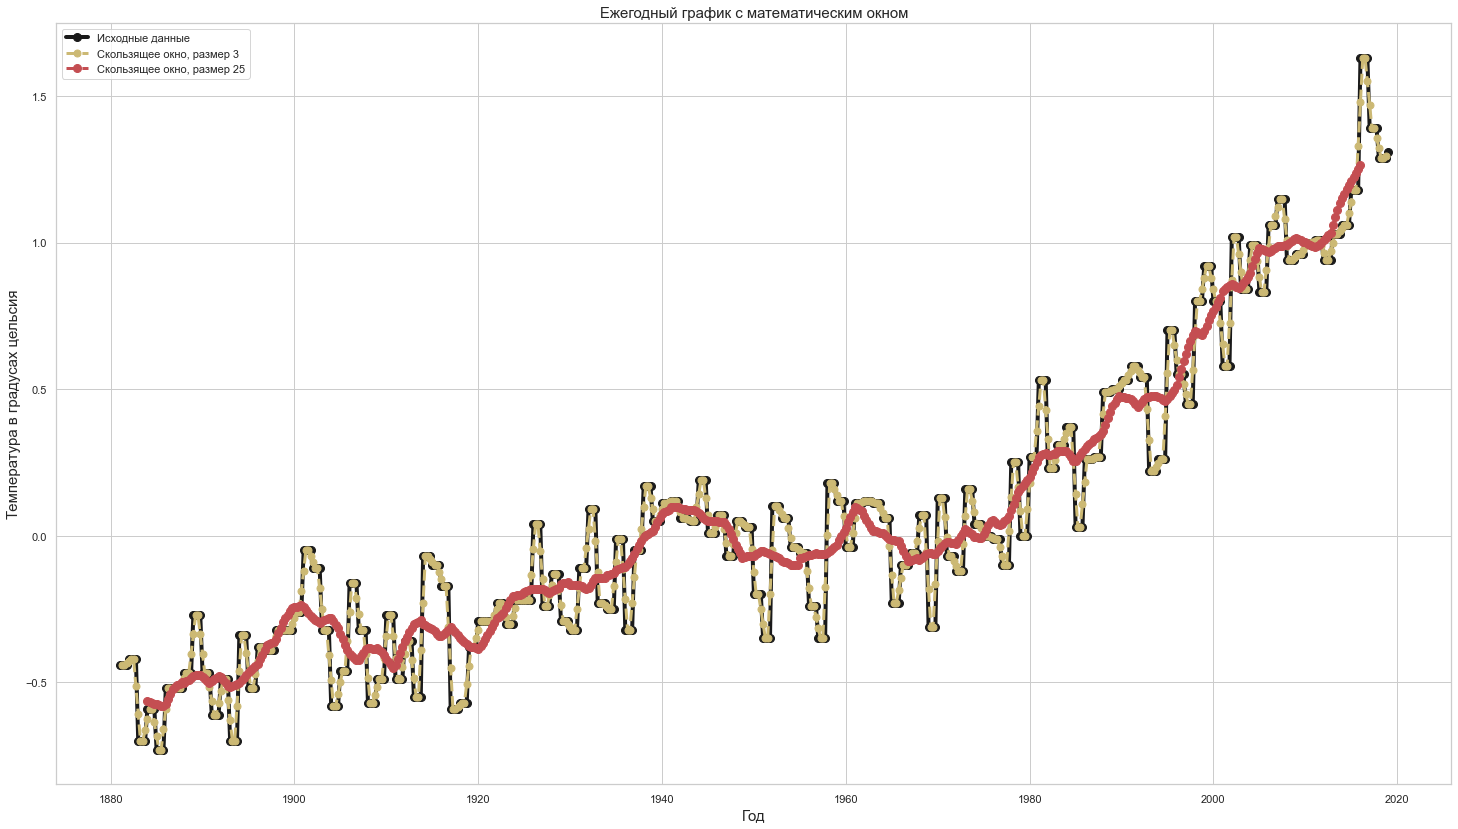

In [21]:


start, end = '1970-01-01', '2020-01-01'
fig, ax = plt.subplots(figsize=(25,14))

ax.plot(Data2, marker='o', markersize=8, linestyle='-',label='Исходные данные',linewidth=4,color='k')
ax.plot(Data2.rolling(window=3,center=True).mean(), marker='o', markersize=7, linestyle='--', label='Скользящее окно, размер 3',linewidth=3,color='y')
# ax.plot(Data.rolling(window=3, win_type='gaussian',center=True).mean(std=10).loc[start:end], marker='o', linestyle='--', 
#         label='GAUSSIAN',linewidth=3,markersize=8,color='r')
# ax.plot(Data.rolling(window=3, win_type='triang',center=True).mean().loc[start:end], marker='o', linestyle='--', label='TRAING',linewidth=3,markersize=8,color='y')
# ax.plot(Data.rolling(window=3, win_type='hamming',center=True).mean().loc[start:end], marker='o', linestyle='--',  label='HAMMING',linewidth=3,markersize=8,color='b')
# ax.plot(Data.rolling(window=5, win_type='bohman',center=True).mean().loc[start:end], marker='o', linestyle='--', label='BOHMAN',linewidth=3,markersize=8,color='m')
ax.plot(Data2.rolling(window=25, center=True).mean(beta=10), marker='o', linestyle='--', label='Скользящее окно, размер 25',linewidth=3,markersize=8,color='r')
# ax.plot(Data.ewm(span=5).mean().loc[start:end], marker='o', linestyle='--',  label='EXPONENTIAL WEIGHTED',linewidth=3,markersize=8,color='g')
ax.set_title('Ежегодный график с математическим окном', fontsize = 15)
ax.set_xlabel('Год', fontsize = 15)
ax.set_ylabel('Температура в градусах цельсия', fontsize = 15)
ax.legend();


In [22]:
# start, end = '1920-01-01', '1950-01-01'
# fig, ax = plt.subplots()

# ax.plot(Data.loc[start:end], marker='o', linestyle='-', linewidth=3, label='ORIGINAL_DATA',markersize=10, color='k')
# ax.plot(Data.rolling(window=5,center=True).mean().loc[start:end], marker='o', markersize=10, linestyle='--', 
#         label='ROLLING_WINDOW',linewidth=3,color='g')
# ax.plot(Data.ewm(span=5).mean().loc[start:end], marker='o', linestyle='--',  label='EXPONENTIAL_WEIGHTED',linewidth=3,markersize=10,color='r')
# ax.set_ylabel('value')
# ax.legend();


# 3) Проанализируем случайные отклонения

In [23]:

ResTime

,Residual
date,
1881-01-01,0.002407
1881-04-01,0.001136
1881-07-01,-0.000694
1881-10-01,-0.002849
1882-01-01,0.002407
...,...
2018-01-01,-0.042593
2018-04-01,-0.013864
2018-07-01,-0.000694


Проверим ряд на стационарность

In [24]:
from statsmodels.tsa.stattools import adfuller, kpss 



result = adfuller(ResTime['Residual'], autolag='AIC')
print(f'Тест Дики — Фуллера: {result[0]}')
print(f'p-значение: {result[1]}')

if result[1] > 0.05:
    print('Нестационарный ряд')
else:
    print('Стационарный ряд')


Тест Дики — Фуллера: -9.94723578951071
p-значение: 2.5702676937285532e-17
Стационарный ряд


In [25]:
stats, p, lags, critical_values = kpss(ResTime['Residual'], 'ct')
print(f'Тест Квятковского-Филлипса-Шмидта-Шина: {stats}')
print(f'p-значение: {p}')

if p<0.05:
      print('Нестационарный ряд')
else:
      print('Стационарный ряд') 



Тест Квятковского-Филлипса-Шмидта-Шина: 0.02790902483981867
p-значение: 0.1
Стационарный ряд


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


Случайные отклонения являются стационарным рядом и их можно использовать для обучения моделей.

# 4) Предсказание данных

In [26]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.tsa.api import acf, pacf, graphics

In [27]:
data = ResTime.asfreq(freq = 'QS')
data

,Residual
date,
1881-01-01,0.002407
1881-04-01,0.001136
1881-07-01,-0.000694
1881-10-01,-0.002849
1882-01-01,0.002407
...,...
2018-01-01,-0.042593
2018-04-01,-0.013864
2018-07-01,-0.000694


In [28]:
data.index

DatetimeIndex(['1881-01-01', '1881-04-01', '1881-07-01', '1881-10-01',
               '1882-01-01', '1882-04-01', '1882-07-01', '1882-10-01',
               '1883-01-01', '1883-04-01',
               ...
               '2016-10-01', '2017-01-01', '2017-04-01', '2017-07-01',
               '2017-10-01', '2018-01-01', '2018-04-01', '2018-07-01',
               '2018-10-01', '2019-01-01'],
              dtype='datetime64[ns]', name='date', length=553, freq='QS-JAN')

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [30]:
Data = pd.read_csv("C:/Climate at a Glance.csv") # Просто читаем данные
DataTr = Data
Data.head(6)

,Global Land Temperature Anomalies,May-April
0,Units: Degrees Celsius,NaN
1,Base Period: 1901-2000,NaN
2,Missing: -999,NaN
3,Year,Value
4,1881,-0.44
5,1882,-0.42


Обрежем первые три строки, т.к. это техническая информация, и она нам не нужна.

Переименуем столбцы для удобства.

In [31]:
Data = Data.drop(index = range(0, 4)) # Обрезка на 4 строки

Data = np.array(Data) # Костыль, который позволяет работать этой ссученой программе
Data = pd.DataFrame(Data)

Data = Data.rename(columns = {0 : 'date', 1 : 'value'}) # Переименование столбцов

DataTr = Data

Data.head()

,date,value
0,1881,-0.44
1,1882,-0.42
2,1883,-0.70
3,1884,-0.59
4,1885,-0.73


Создадим обуч\тест выборки

In [32]:
# # train1, test1 = np.array(DataTr[:int(len(Data)*0.85)].astype('float64')), np.array(DataTr[int(len(Data)*0.85):].astype('float64'))
# train, test = Data2['1980':'2010'].reset_index(), Data2['2010':].reset_index()

# Xtrain, Xtest = np.array(train['date']).reshape(-1,1), np.array(test['date']).reshape(-1,1)
# ytrain, ytest = np.array(train['value']).reshape(-1,1), np.array(test['value']).reshape(-1,1)

# X_all = np.array(Data2['1980':].reset_index()['date']).reshape(-1,1)

Обучим 

In [33]:
# model1 = LinearRegression().fit(Xtrain, ytrain)
# model2 = SVR(kernel = 'rbf').fit(Xtrain, ytrain)

# lin = model1.predict(X_all)
# rbf = model2.predict(X_all)

# plt.plot(Xtrain, ytrain, label = 'Train')
# plt.plot(Xtest, ytest, label = 'Test')

# plt.plot(X_all, lin)
# plt.plot(X_all, rbf)

# 4.2) AutoReg



In [34]:
Data['date'] = pd.to_datetime(Data['date'], format="%Y") 
Data['value'] = Data['value'].astype({'value': 'float64'})
Data = Data.set_index('date')

print(Data.info())
Data.head() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 139 entries, 1881-01-01 to 2019-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   139 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB
None


,value
date,
1881-01-01,-0.44
1882-01-01,-0.42
1883-01-01,-0.70
1884-01-01,-0.59
1885-01-01,-0.73


In [35]:

sel = ar_select_order(Data2, 15, seasonal=True, old_names=False, period = 12)

In [36]:
res = sel.model.fit()
print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:                  value   No. Observations:                  553
Model:              Seas. AutoReg(13)   Log Likelihood                 563.244
Method:               Conditional MLE   S.D. of innovations              0.085
Date:                Thu, 17 Jun 2021   AIC                             -4.828
Time:                        11:09:15   BIC                             -4.621
Sample:                    04-01-1884   HQIC                            -4.747
                         - 01-01-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0416      0.013      3.226      0.001       0.016       0.067
s(2,12)       -0.0417      0.018     -2.286      0.022      -0.077      -0.006
s(3,12)       -0.0417      0.018     -2.286      0.0

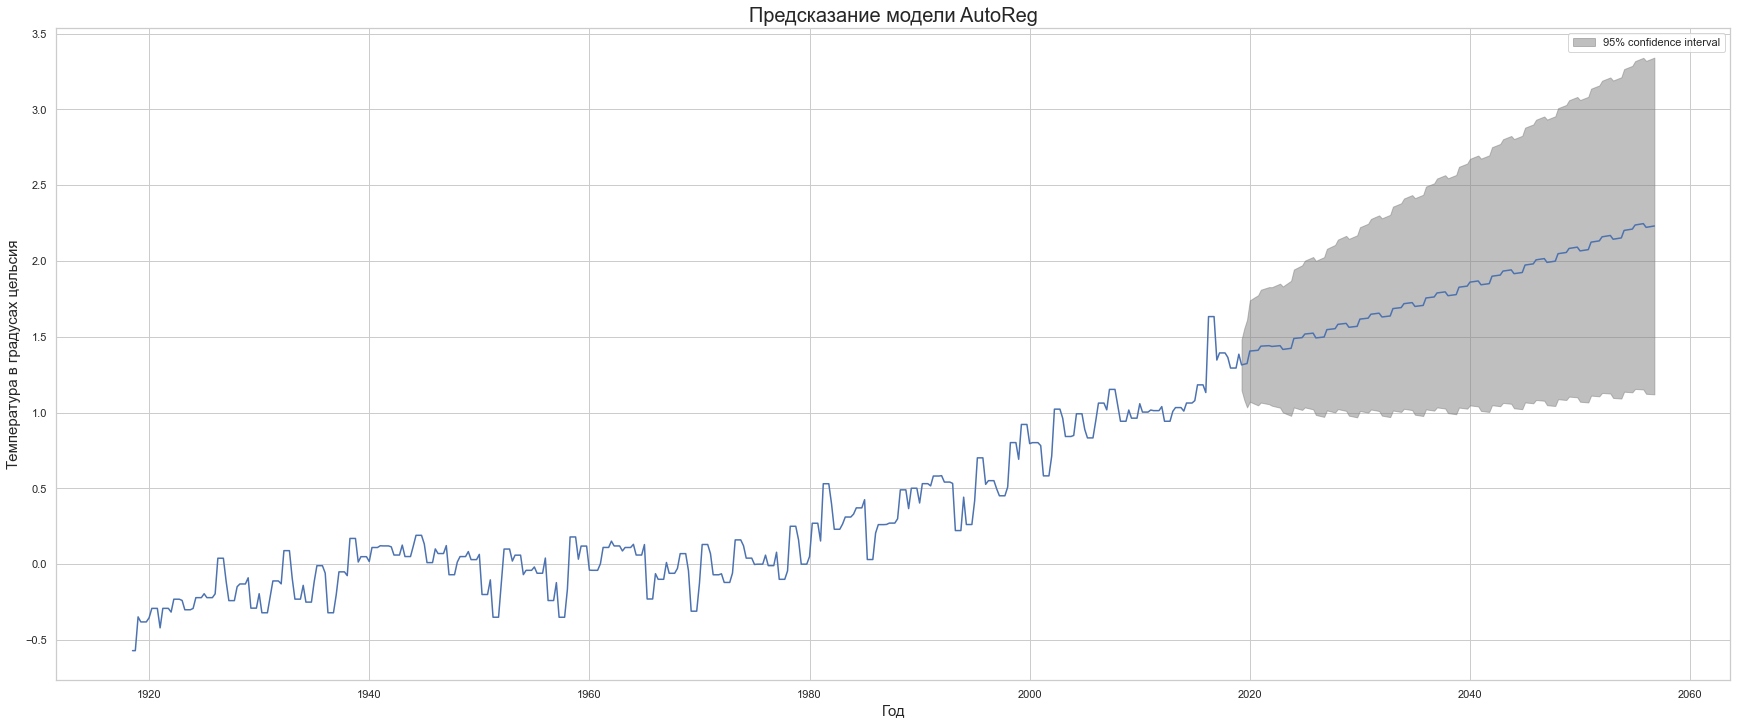

In [37]:
fig = res.plot_predict(150, len(Data2) + 150)
plt.title('Предсказание модели AutoReg', fontsize = 20);
plt.xlabel('Год', fontsize = 15)
plt.ylabel('Температура в градусах цельсия', fontsize = 15)
plt.show()

# 4.3) Экспоненциальное скользящее



In [38]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [39]:
data = Data2.loc['1970':]
data.isna().sum()
# data.dropna()

value    0
dtype: int64

In [40]:
data.index

DatetimeIndex(['1970-01-01', '1970-04-01', '1970-07-01', '1970-10-01',
               '1971-01-01', '1971-04-01', '1971-07-01', '1971-10-01',
               '1972-01-01', '1972-04-01',
               ...
               '2016-10-01', '2017-01-01', '2017-04-01', '2017-07-01',
               '2017-10-01', '2018-01-01', '2018-04-01', '2018-07-01',
               '2018-10-01', '2019-01-01'],
              dtype='datetime64[ns]', name='date', length=197, freq='QS-JAN')

In [41]:
data

,value
date,
1970-01-01,0.13
1970-04-01,0.13
1970-07-01,0.13
1970-10-01,0.13
1971-01-01,-0.07
...,...
2018-01-01,1.29
2018-04-01,1.29
2018-07-01,1.29


In [42]:
train, test = data[:int(len(data)*0.8)], data[int(len(data)*0.8):]

In [43]:
model = ExponentialSmoothing(train, seasonal='Add', trend = 'Add', seasonal_periods=12).fit(optimized=True)

pred = model.predict(start=test.index[0], end=test.index[-1])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


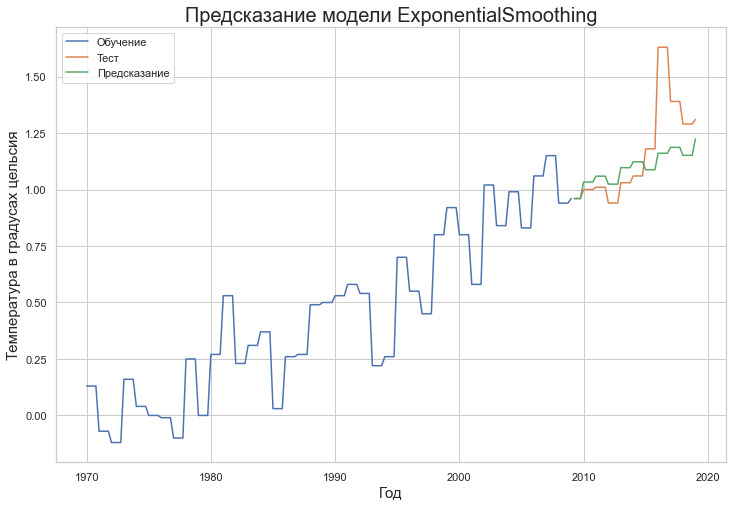

In [44]:
plt.figure(figsize=(12,8))
plt.title('Предсказание модели ExponentialSmoothing', fontsize = 20);
plt.xlabel('Год', fontsize = 15)
plt.ylabel('Температура в градусах цельсия', fontsize = 15)
plt.plot(train, label='Обучение')
plt.plot(test, label='Тест')
plt.plot(pred, label='Предсказание')
plt.legend()
plt.show()



# 4.4) ARIMA



In [45]:
from pandas import read_csv, DataFrame
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score

In [46]:
import pmdarima as pm
from pmdarima.arima import ADFTest

adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(Data)

(0.9624939640726908, True)

In [47]:
import pmdarima as pmd

Drata = data

train = Drata[:int(0.85*(len(Drata)))]
valid = Drata[int(0.85*(len(Drata))):]

arima_model = pmd.auto_arima(train,  
                              start_p=4,d = 1,start_q=2, 
                              test="adf", supress_warnings = True,
                              trace=True)

#Summary of the model
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-309.117, Time=0.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-285.503, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-283.504, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-283.504, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-287.047, Time=0.04 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-299.500, Time=0.41 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=-306.245, Time=0.74 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=-303.020, Time=0.71 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-288.603, Time=0.71 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-297.500, Time=0.21 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(4,1,2)(0,0,0)[0]             : AIC=-298.370, Time=0.05 sec

Best model:  ARIMA(4,1,2)(0,0,0)[0] intercept
T

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  167
Model:               SARIMAX(4, 1, 2)   Log Likelihood                 162.558
Date:                Thu, 17 Jun 2021   AIC                           -309.117
Time:                        11:09:23   BIC                           -284.221
Sample:                             0   HQIC                          -299.011
                                - 167                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0044      0.002      1.968      0.049    1.83e-05       0.009
ar.L1         -0.0328      0.298     -0.110      0.913      -0.618       0.552
ar.L2          0.6703      0.164      4.080      0.000       0.348       0.992
ar.L3          0.0147      0.289      0.051      0.959      -0.551       0.581
ar.L4         -0.3011      0.127     -2.366      0.018      -0.551      -0.052
ma.L1         -0.0672      0.179     -0.376      0.707      -0.417       0.283
ma.L2         -0.8444      0.106     -7.942      0.000      -1.053      -0.636
sigma2         0.0082      0.001     13.074      0.000       0.007       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):               202.53
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                             1.00
Prob(H) (two-sided):                  0.87   Kurtosis:                         8.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
valid['predicted'] = arima_model.predict(n_periods = len(valid)) # Создадим новый столбец с предсказанными значениями

def MAPE(true, pred): 
    true, pred = np.array(true), np.array(pred)
    return np.mean(np.abs((true - pred) / true)) * 100

print('Абсолютная средняя ошибка')
MAPE(valid.value, valid.predicted)

Абсолютная средняя ошибка


<ipython-input-48-6d0dfea3630f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predicted'] = arima_model.predict(n_periods = len(valid)) # Создадим новый столбец с предсказанными значениями


10.074355075178367

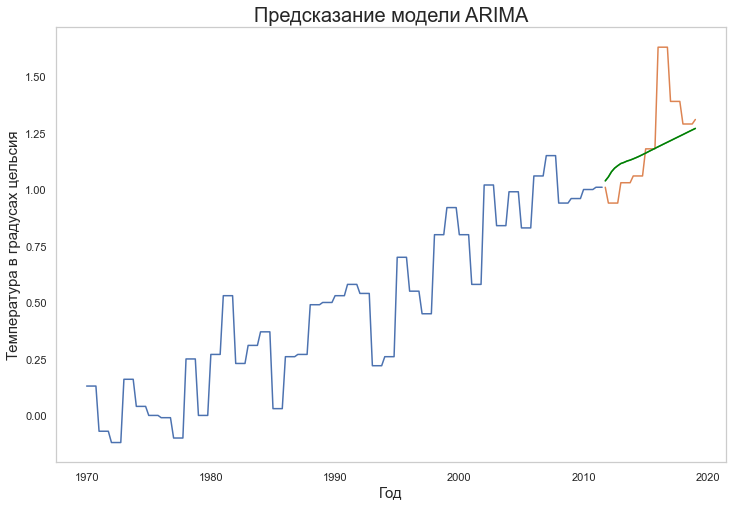

In [49]:
fig, ax1 = plt.subplots(1,figsize=(12,8))
ax1.plot(train)
ax1.plot(valid)
ax1.plot(valid.predicted, color = 'green')
ax1.grid()
ax1.set_title('Предсказание модели ARIMA', fontsize = 20);
ax1.set_xlabel('Год', fontsize = 15)
ax1.set_ylabel('Температура в градусах цельсия', fontsize = 15);

# 

Performing stepwise search to minimize aic
 ARIMA(25,2,16)(0,0,0)[0] intercept   : AIC=-281.396, Time=11.93 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-167.940, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-213.122, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-169.940, Time=0.02 sec
 ARIMA(24,2,16)(0,0,0)[0] intercept   : AIC=inf, Time=10.27 sec
 ARIMA(25,2,15)(0,0,0)[0] intercept   : AIC=-279.020, Time=11.86 sec
 ARIMA(26,2,16)(0,0,0)[0] intercept   : AIC=-275.971, Time=12.21 sec
 ARIMA(25,2,17)(0,0,0)[0] intercept   : AIC=inf, Time=12.12 sec
 ARIMA(24,2,15)(0,0,0)[0] intercept   : AIC=-280.708, Time=11.11 sec
 ARIMA(24,2,17)(0,0,0)[0] intercept   : AIC=inf, Time=25.69 sec
 ARIMA(26,2,15)(0,0,0)[0] intercept   : AIC=-278.873, Time=29.45 sec
 ARIMA(26,2,17)(0,0,0)[0] intercept   : AIC=-269.936, Time=14.56 sec
 ARIMA(25,2,16)(0,0,0)[0]             : AIC=inf, Time=11.99 sec

Best model:  ARIMA(25,2,16)

<ipython-input-50-ac6f59c7e554>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predicted'] = arima_model.predict(n_periods = len(valid)) # Создадим новый столбец с предсказанными значениями


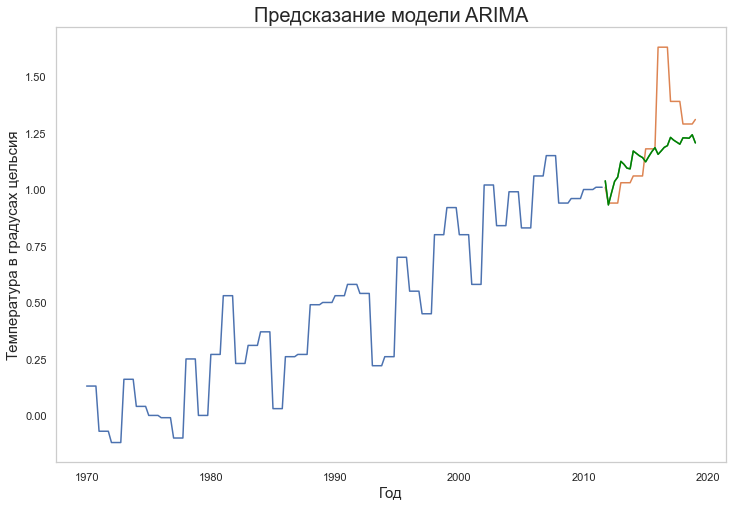

In [50]:
import pmdarima as pmd
# aa=0
# bb=0
# cc=0

Drata = data

train = Drata[:int(0.85*(len(Drata)))]
valid = Drata[int(0.85*(len(Drata))):]


arima_model = pm.auto_arima(train, start_p=25, start_q=16,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=100, max_q=100, # maximum p and q
                      m=1,              # frequency of series
                      d=2,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)





# arima_model = pmd.auto_arima(train,  
#                               start_p=aa,d = bb,start_q=cc, 
#                               test="adf", supress_warnings = True,
#                               trace=True)

#Summary of the model
arima_model.summary()

valid['predicted'] = arima_model.predict(n_periods = len(valid)) # Создадим новый столбец с предсказанными значениями

def MAPE(true, pred): 
    true, pred = np.array(true), np.array(pred)
    return np.mean(np.abs((true - pred) / true)) * 100

print('Абсолютная средняя ошибка')
MAPE(valid.value, valid.predicted)
fig, ax1 = plt.subplots(1,figsize=(12,8))
ax1.plot(train)
ax1.plot(valid)
ax1.plot(valid.predicted, color = 'green')
ax1.grid()
ax1.set_title('Предсказание модели ARIMA', fontsize = 20);
ax1.set_xlabel('Год', fontsize = 15)
ax1.set_ylabel('Температура в градусах цельсия', fontsize = 15);

Performing stepwise search to minimize aic
 ARIMA(55,2,16)(0,0,0)[0] intercept   : AIC=-281.257, Time=133.99 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-167.940, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-213.122, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-169.940, Time=0.02 sec
 ARIMA(54,2,16)(0,0,0)[0] intercept   : AIC=-267.212, Time=108.09 sec
 ARIMA(55,2,15)(0,0,0)[0] intercept   : AIC=-278.369, Time=104.51 sec
 ARIMA(55,2,17)(0,0,0)[0] intercept   : AIC=-277.044, Time=101.26 sec
 ARIMA(54,2,15)(0,0,0)[0] intercept   : AIC=-268.258, Time=95.81 sec
 ARIMA(54,2,17)(0,0,0)[0] intercept   : AIC=-264.831, Time=91.85 sec
 ARIMA(55,2,16)(0,0,0)[0]             : AIC=inf, Time=88.37 sec

Best model:  ARIMA(55,2,16)(0,0,0)[0] intercept
Total fit time: 724.292 seconds
Абсолютная средняя ошибка


<ipython-input-51-e9800c2e5a3e>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predicted'] = arima_model.predict(n_periods = len(valid)) # Создадим новый столбец с предсказанными значениями


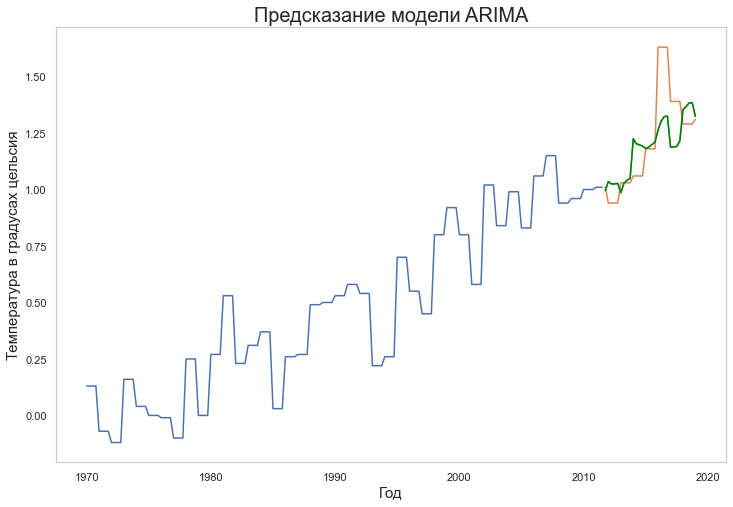

In [51]:
import pmdarima as pmd
# aa=0
# bb=0
# cc=0

Drata = data

train = Drata[:int(0.85*(len(Drata)))]
valid = Drata[int(0.85*(len(Drata))):]


arima_model = pm.auto_arima(train, start_p=75, start_q=16,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=100, max_q=100, # maximum p and q
                      m=1,              # frequency of series
                      d=2,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)





# arima_model = pmd.auto_arima(train,  
#                               start_p=aa,d = bb,start_q=cc, 
#                               test="adf", supress_warnings = True,
#                               trace=True)

#Summary of the model
arima_model.summary()

valid['predicted'] = arima_model.predict(n_periods = len(valid)) # Создадим новый столбец с предсказанными значениями

def MAPE(true, pred): 
    true, pred = np.array(true), np.array(pred)
    return np.mean(np.abs((true - pred) / true)) * 100

print('Абсолютная средняя ошибка')
MAPE(valid.value, valid.predicted)
fig, ax1 = plt.subplots(1,figsize=(12,8))
ax1.plot(train)
ax1.plot(valid)
ax1.plot(valid.predicted, color = 'green')
ax1.grid()
ax1.set_title('Предсказание модели ARIMA', fontsize = 20);
ax1.set_xlabel('Год', fontsize = 15)
ax1.set_ylabel('Температура в градусах цельсия', fontsize = 15);

Performing stepwise search to minimize aic
 ARIMA(55,0,16)(0,0,0)[0] intercept   : AIC=-291.708, Time=102.98 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=146.081, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-284.894, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-38.986, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=308.515, Time=0.03 sec
 ARIMA(54,0,16)(0,0,0)[0] intercept   : AIC=-298.122, Time=91.84 sec
 ARIMA(53,0,16)(0,0,0)[0] intercept   : AIC=-297.908, Time=93.40 sec
 ARIMA(54,0,15)(0,0,0)[0] intercept   : AIC=-311.415, Time=96.66 sec
 ARIMA(53,0,15)(0,0,0)[0] intercept   : AIC=-298.528, Time=82.26 sec
 ARIMA(54,0,14)(0,0,0)[0] intercept   : AIC=-288.571, Time=90.72 sec
 ARIMA(55,0,15)(0,0,0)[0] intercept   : AIC=-294.176, Time=103.19 sec
 ARIMA(53,0,14)(0,0,0)[0] intercept   : AIC=inf, Time=88.63 sec
 ARIMA(55,0,14)(0,0,0)[0] intercept   : AIC=inf, Time=103.58 sec
 ARIMA(54,0,15)(0,0,0)[0]             : AIC=-298.417, Time=83.75 sec

Best model: 

<ipython-input-52-459159d8fa9a>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predicted'] = arima_model.predict(n_periods = len(valid)) # Создадим новый столбец с предсказанными значениями


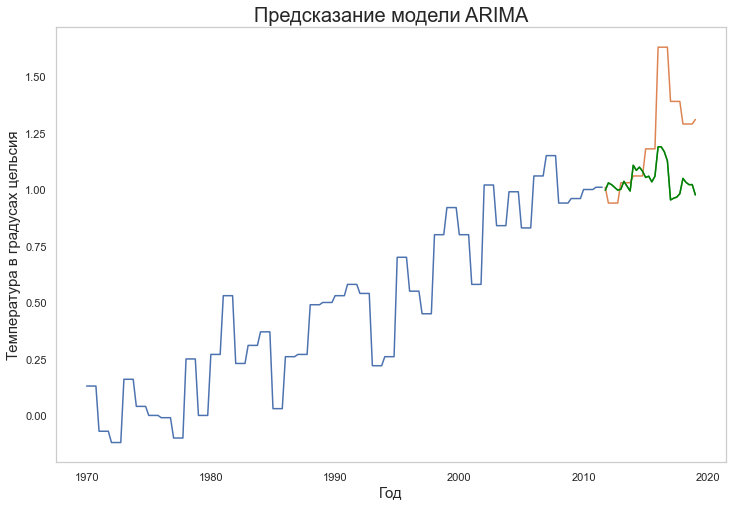

In [52]:
import pmdarima as pmd
aa=55
bb=0
cc=16

Drata = data

train = Drata[:int(0.85*(len(Drata)))]
valid = Drata[int(0.85*(len(Drata))):]

arima_model = pmd.auto_arima(train,  
                              start_p=aa, D = bb, start_q=cc,
                              max_p=100, max_q=100,
                              test="adf", supress_warnings = True,
                              trace=True)

#Summary of the model
arima_model.summary()

valid['predicted'] = arima_model.predict(n_periods = len(valid)) # Создадим новый столбец с предсказанными значениями

def MAPE(true, pred): 
    true, pred = np.array(true), np.array(pred)
    return np.mean(np.abs((true - pred) / true)) * 100

print('Абсолютная средняя ошибка')
MAPE(valid.value, valid.predicted)
fig, ax1 = plt.subplots(1,figsize=(12,8))
ax1.plot(train)
ax1.plot(valid)
ax1.plot(valid.predicted, color = 'green')
ax1.grid()
ax1.set_title('Предсказание модели ARIMA', fontsize = 20);
ax1.set_xlabel('Год', fontsize = 15)
ax1.set_ylabel('Температура в градусах цельсия', fontsize = 15);

Performing stepwise search to minimize aic
 ARIMA(55,2,16)(0,0,0)[0] intercept   : AIC=-281.257, Time=95.24 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-167.940, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-213.122, Time=0.10 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-169.940, Time=0.02 sec
 ARIMA(54,2,16)(0,0,0)[0] intercept   : AIC=-267.212, Time=99.58 sec
 ARIMA(55,2,15)(0,0,0)[0] intercept   : AIC=-278.369, Time=98.97 sec
 ARIMA(55,2,17)(0,0,0)[0] intercept   : AIC=-277.044, Time=99.31 sec
 ARIMA(54,2,15)(0,0,0)[0] intercept   : AIC=-268.258, Time=92.84 sec
 ARIMA(54,2,17)(0,0,0)[0] intercept   : AIC=-264.831, Time=93.68 sec
 ARIMA(55,2,16)(0,0,0)[0]             : AIC=inf, Time=89.62 sec

Best model:  ARIMA(55,2,16)(0,0,0)[0] intercept
Total fit time: 669.638 seconds
Абсолютная средняя ошибка


<ipython-input-53-cf55a2ce809e>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predicted'] = arima_model.predict(n_periods = len(valid)) # Создадим новый столбец с предсказанными значениями


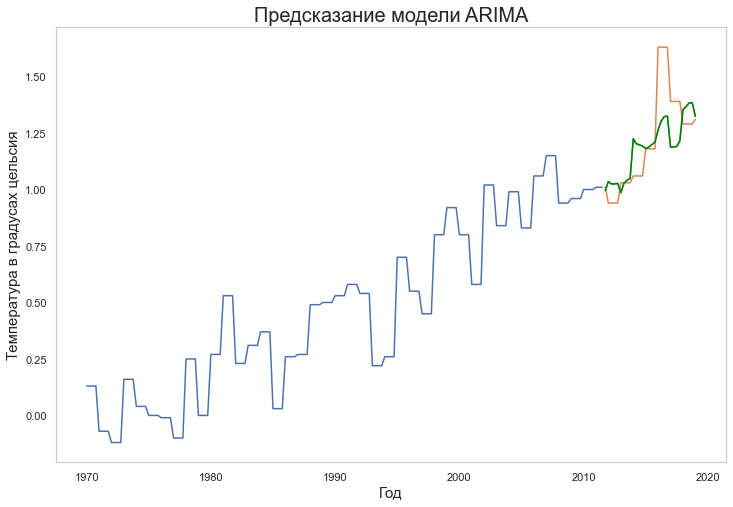

In [53]:
import pmdarima as pmd
# aa=0
# bb=0
# cc=0

Drata = data

train = Drata[:int(0.85*(len(Drata)))]
valid = Drata[int(0.85*(len(Drata))):]


arima_model = pm.auto_arima(train, start_p=75, start_q=16,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=1000, max_q=1000, # maximum p and q
                      m=1,              # frequency of series
                      d=2,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)





# arima_model = pmd.auto_arima(train,  
#                               start_p=aa,d = bb,start_q=cc, 
#                               test="adf", supress_warnings = True,
#                               trace=True)

#Summary of the model
arima_model.summary()

valid['predicted'] = arima_model.predict(n_periods = len(valid)) # Создадим новый столбец с предсказанными значениями

def MAPE(true, pred): 
    true, pred = np.array(true), np.array(pred)
    return np.mean(np.abs((true - pred) / true)) * 100

print('Абсолютная средняя ошибка')
MAPE(valid.value, valid.predicted)
fig, ax1 = plt.subplots(1,figsize=(12,8))
ax1.plot(train)
ax1.plot(valid)
ax1.plot(valid.predicted, color = 'green')
ax1.grid()
ax1.set_title('Предсказание модели ARIMA', fontsize = 20);
ax1.set_xlabel('Год', fontsize = 15)
ax1.set_ylabel('Температура в градусах цельсия', fontsize = 15);